In [22]:
import numpy as np
import pandas as pd
from pandas import read_csv
print('ok')

data = pd.read_csv("amazon1.txt")
data.head()
data.shape
print(data.ACTION.mean())


# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size=0.3, random_state=241)

ok
0.9421099209618847
ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [4]:
print(X_train)

       RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
1728      40867    8150         117961         118386         119954   
22856     38587   14551           5110         117954         117895   
27691      3853   51301         118290         118291         121108   
8421      45337   49423         117961         118052         123144   
5013      40919   87700         118315         118463         118464   
9044       6215    6217         117961         118327         118328   
25556     20364   15887         117961         118052         120356   
25066     75723    4712         117961         118343         118395   
29205     78766   65460         118079         118080         117878   
3926       6977    5987         117961         118446          16232   
31362     34714    2017         117961         118327         121645   
22770     37942   20138           5110         117954         117895   
2970      45580   25547         117961         118327         11

In [5]:
print(X_test)

       RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
24312     80769    7525         117961         118225         120551   
12246     53101    7014         117961         118446         119961   
15099     19989   15542         117961         118300         118395   
22149     40158    7551         117961         118052         118867   
24776     70452   58590         118953         118954         117884   
13005     16443   15824         117961         118225         120323   
13685      7678   58702         118256         118257         117945   
30750     15730     744         117961         118300         120722   
26864     16174    4549         117961         118225         120050   
26577      1937    2163         118219         118220         120694   
26011     25993   15967         117961         118300         124942   
16485     23497   48956         117961         118052         120356   
12780       980  101834         119134         119135         11

In [6]:
print(y_train)

1728     1
22856    1
27691    1
8421     1
5013     1
9044     1
25556    1
25066    1
29205    1
3926     1
31362    1
22770    1
2970     1
1670     1
6517     1
14986    1
17585    1
7439     1
14509    1
17941    1
6647     1
17813    1
4985     0
27863    1
7249     1
29161    1
28416    1
19343    1
10199    1
32280    1
        ..
6103     1
9798     1
18672    1
3498     1
32648    1
8960     1
16035    1
24902    1
2543     0
15899    1
15316    1
4407     1
19262    1
3379     1
25015    1
4639     1
21785    1
19308    1
20036    1
4987     1
31369    1
26772    1
8664     1
8690     1
144      1
10987    1
20727    1
26202    1
29982    1
12716    1
Name: ACTION, Length: 22938, dtype: int64


In [7]:
print(y_test)

24312    1
12246    1
15099    1
22149    1
24776    1
13005    1
13685    1
30750    1
26864    1
26577    1
26011    1
16485    1
12780    1
30047    1
15641    1
9838     1
4661     1
4126     1
7924     1
22040    1
10301    1
19189    1
14922    1
14431    1
9998     1
2413     1
25176    1
12377    1
3741     1
18102    1
        ..
20741    1
25540    1
249      0
25568    1
20824    1
20990    0
29347    1
3404     1
6343     1
16181    1
18809    1
28900    0
25726    1
816      1
4624     1
5001     1
7528     1
7228     1
28797    1
29741    1
27748    1
23590    1
15057    1
13157    0
24445    1
5085     1
22859    1
25949    0
1845     1
30190    0
Name: ACTION, Length: 9831, dtype: int64


In [23]:
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier

In [24]:
from sklearn.metrics import roc_auc_score

#### Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Мера качества — AUC-ROC.

Косинусное расстояние 

In [18]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine')
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [19]:
y_true, y_pred = y_test, model.predict(X_test)

In [20]:
roc_auc_score(y_true, y_pred)

0.5184162628556395

Манхэттенское расстояние

In [11]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan')
model.fit(X_train,y_train)
y_true, y_pred = y_test, model.predict(X_test)
roc_auc_score(y_true, y_pred)

0.5239873993707233

Евклидово расстояние

In [12]:
model = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
model.fit(X_train,y_train)
y_true, y_pred = y_test, model.predict(X_test)
roc_auc_score(y_true, y_pred)

0.5176954413023741

model = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan')
Функция с манхэттенское расстоянием оказалось лучшей с результатом 0.5239873993707233.

#### 3. Реализуйте счетчики (http://blogs.technet.com/b/machinelearning/archive/2015/02/17/big-learning-made-easy-with-counts.aspx), которые заменят категориальные признаки на вещественные.

А именно, каждый категориальный признак нужно заменить на три: 
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
3. Сглаженное отношение двух предыдущих величин: (`successes` + 1) / (`counts` + 2).

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанные по всей обучающей выборке. Реализуйте и такой вариант. Можно использовать $n = 3$.

#### Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

In [27]:
def MakeCounters(train, extractable_data, extractable_data_ans):
    train_modified = pd.DataFrame(index=train.index)
    for feature in train.columns:
        vc = extractable_data[feature].value_counts()
        vc_t = (extractable_data[feature] * extractable_data_ans).value_counts()

        train_modified[feature + "_counts"] = pd.Series([vc.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_successes"] = pd.Series([vc_t.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_cs"] = (train_modified[feature + "_successes"] + 1) / (train_modified[feature + "_counts"] + 2)

    return train_modified

In [30]:
import math
import matplotlib.pyplot as plt
import sklearn.neighbors
import sklearn.ensemble as ensemble
from sklearn import tree

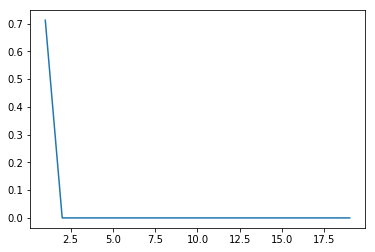

BEST k:  1
BEST AUC-ROC:  0.7120919028610739


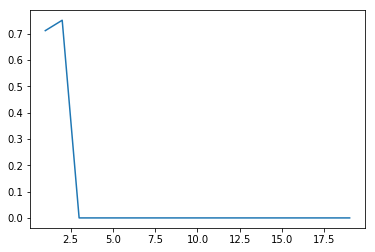

BEST k:  2
BEST AUC-ROC:  0.7515965541459011


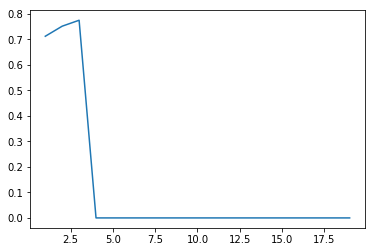

BEST k:  3
BEST AUC-ROC:  0.7748545956821873


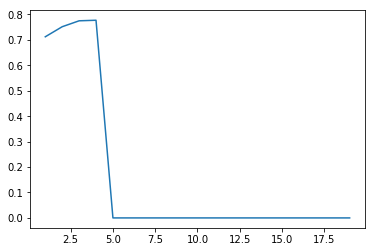

BEST k:  4
BEST AUC-ROC:  0.7770610895817114


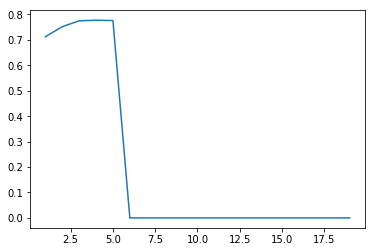

BEST k:  4
BEST AUC-ROC:  0.7770610895817114


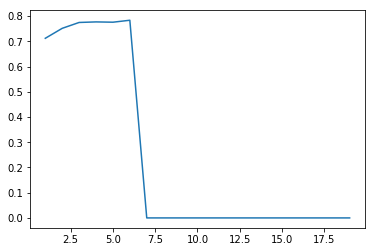

BEST k:  6
BEST AUC-ROC:  0.7836574783933246


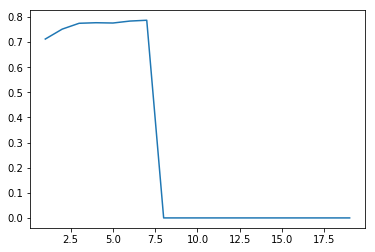

BEST k:  7
BEST AUC-ROC:  0.7869464626010247


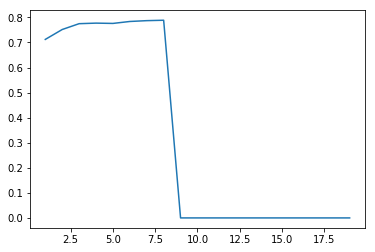

BEST k:  8
BEST AUC-ROC:  0.7885657502115201


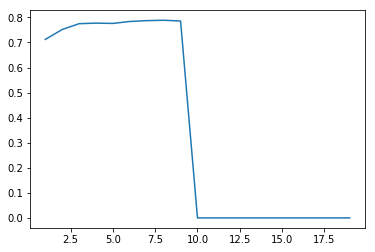

BEST k:  8
BEST AUC-ROC:  0.7885657502115201


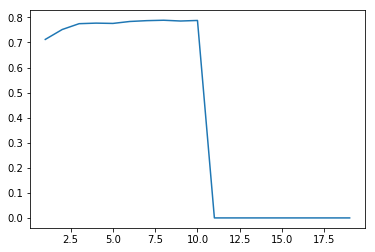

BEST k:  8
BEST AUC-ROC:  0.7885657502115201


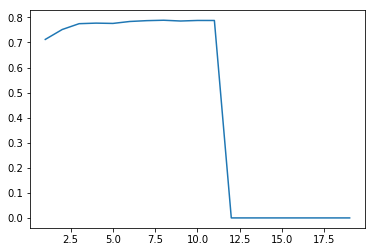

BEST k:  8
BEST AUC-ROC:  0.7885657502115201


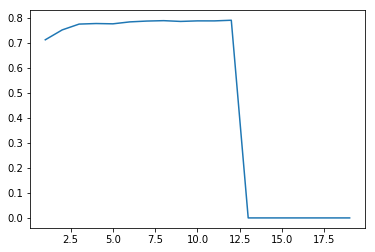

BEST k:  12
BEST AUC-ROC:  0.7902109162323048


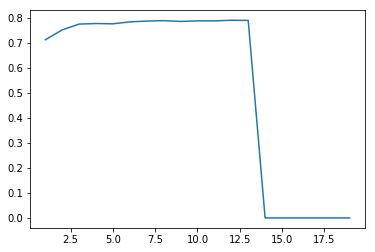

BEST k:  12
BEST AUC-ROC:  0.7902109162323048


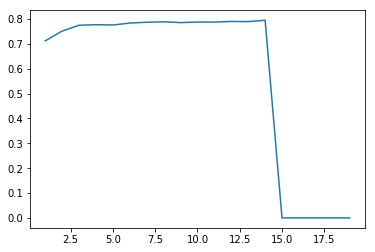

BEST k:  14
BEST AUC-ROC:  0.79500983379591


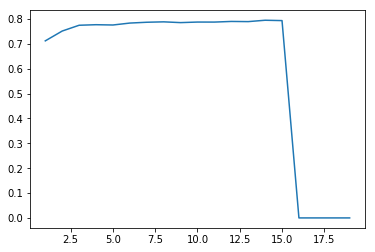

BEST k:  14
BEST AUC-ROC:  0.79500983379591


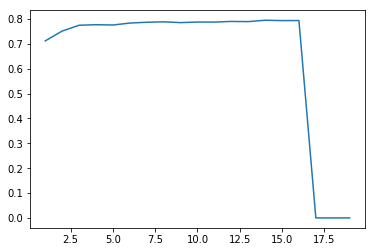

BEST k:  14
BEST AUC-ROC:  0.79500983379591


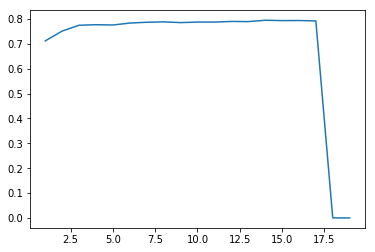

BEST k:  14
BEST AUC-ROC:  0.79500983379591


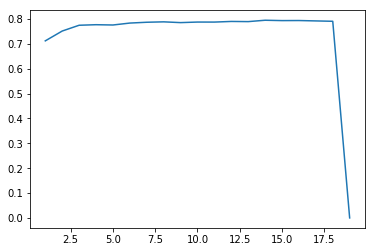

BEST k:  14
BEST AUC-ROC:  0.79500983379591


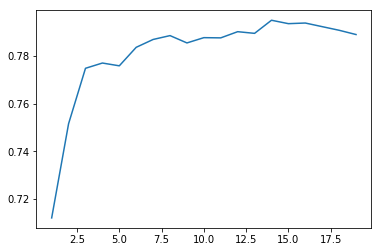

BEST k:  14
BEST AUC-ROC:  0.79500983379591


In [31]:
mod_train = MakeCounters(X_train, X_train, y_train)
mod_test = MakeCounters(X_test, X_train, y_train)

k_list = np.arange(1, 20)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm= 'kd_tree').fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])

    plt.plot(k_list, auc_roc)
    plt.show()

    print("BEST k: ", k_list[np.argmax(auc_roc)])
    print("BEST AUC-ROC: ", np.max(auc_roc))

In [32]:
def MakeCountersWithFolding(X_train, y_train):

    L = len(X_train)
    mt1 = MakeCounters(X_train[:L//3], X_train[L//3:], y_train[L//3:])
    indexes = np.append(np.arange(0, L//3), np.arange(2*L//3, L))
    mt2 = MakeCounters(X_train[L//3:2*L//3], X_train.iloc[indexes], y_train.iloc[indexes])
    mt3 = MakeCounters(X_train[2*L//3:], X_train[:2*L//3], y_train[:2*L//3])
    mt = pd.concat([mt1, mt2, mt3])

    for feature in mt.columns[np.arange(0, len(mt.columns), 3)]:
        mt[feature] *= 3 / 2
    for feature in mt.columns[np.arange(1, len(mt.columns), 3)]:
        mt[feature] *= 3 / 2
    return mt


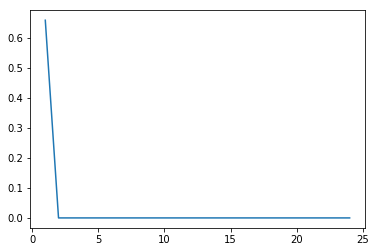

BEST k:  1
BEST AUC-ROC:  0.6580863562551352


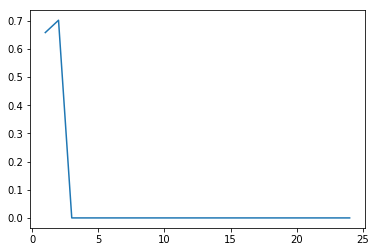

BEST k:  2
BEST AUC-ROC:  0.7018332697155747


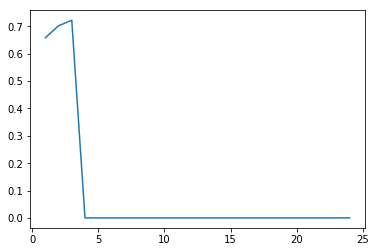

BEST k:  3
BEST AUC-ROC:  0.7220831257669175


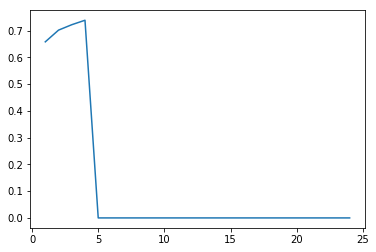

BEST k:  4
BEST AUC-ROC:  0.7387787439050951


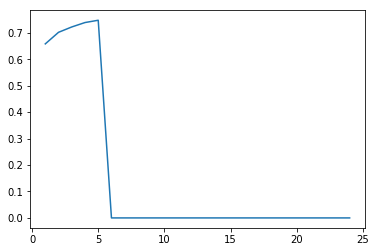

BEST k:  5
BEST AUC-ROC:  0.7474704752498165


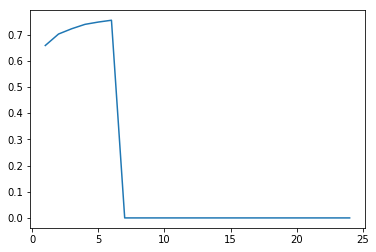

BEST k:  6
BEST AUC-ROC:  0.7544441676892234


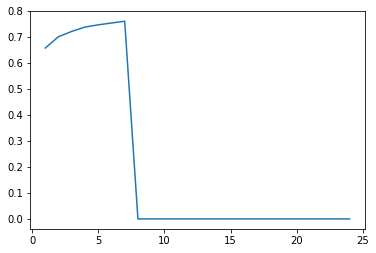

BEST k:  7
BEST AUC-ROC:  0.7612667230240936


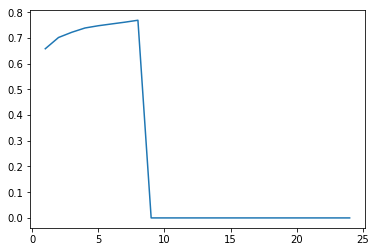

BEST k:  8
BEST AUC-ROC:  0.7689045381386665


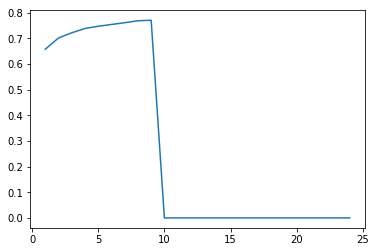

BEST k:  9
BEST AUC-ROC:  0.7709309614332613


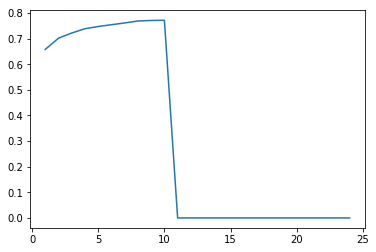

BEST k:  10
BEST AUC-ROC:  0.7718588102688407


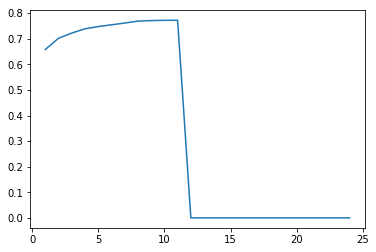

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


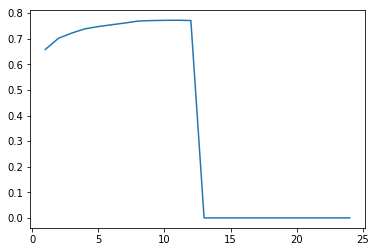

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


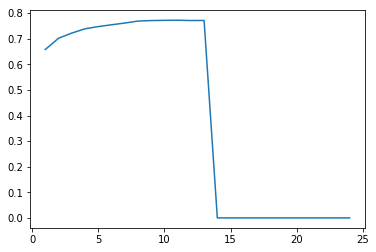

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


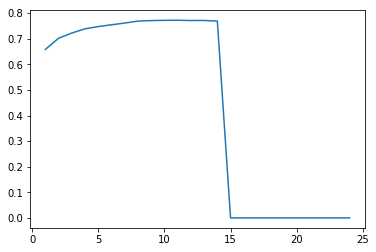

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


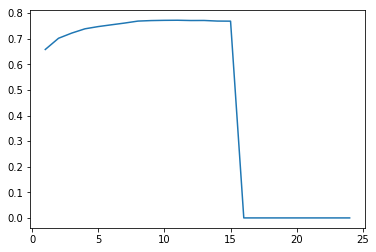

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


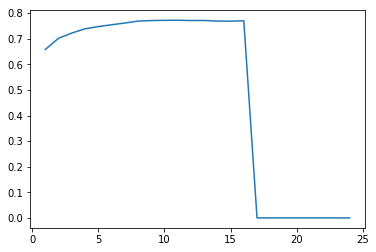

BEST k:  11
BEST AUC-ROC:  0.7722255109368631


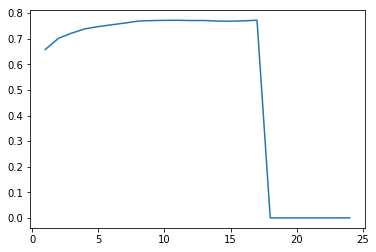

BEST k:  17
BEST AUC-ROC:  0.7723078186584775


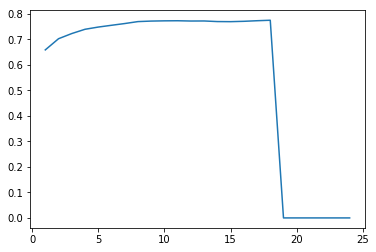

BEST k:  18
BEST AUC-ROC:  0.7742007165444271


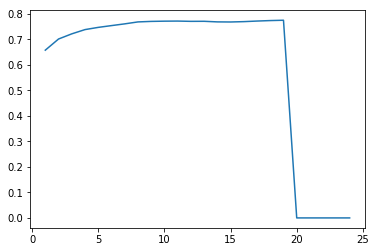

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


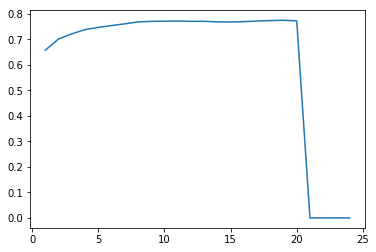

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


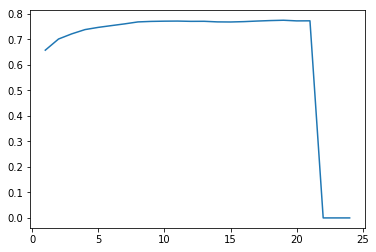

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


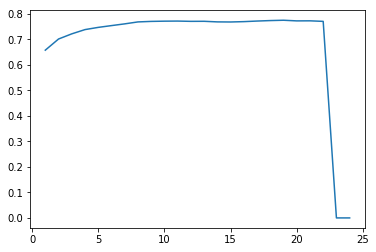

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


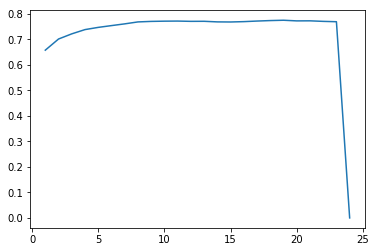

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


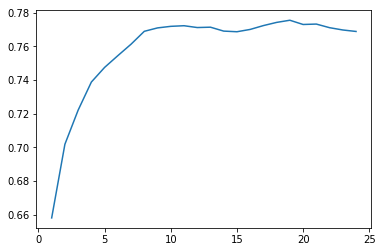

BEST k:  19
BEST AUC-ROC:  0.7754806195866499


In [33]:
mod_train = MakeCountersWithFolding(X_train, y_train)
mod_test = MakeCounters(X_test, X_train, y_train)

k_list = np.arange(1, 25)
auc_roc = np.empty(k_list.shape)

for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm= 'kd_tree').fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])

    plt.plot(k_list, auc_roc)
    plt.show()

    print("BEST k: ", k_list[np.argmax(auc_roc)])
    print("BEST AUC-ROC: ", np.max(auc_roc))

In [41]:
def MakeCountersAndNormalize(train, extractable_data, extractable_data_ans):
    train_modified = pd.DataFrame(index=train.index)
    
    for feature in train.columns:
        vc = extractable_data[feature].value_counts()
        vc_t = (extractable_data[feature] * extractable_data_ans).value_counts()
        train_modified[feature + "_counts"] = pd.Series([vc.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_successes"] = pd.Series([vc_t.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_cs"] = (train_modified[feature + "_successes"] + 1) / (train_modified[feature + "_counts"] + 2)
        train_modified[feature + "_counts"] /= len(extractable_data)
        train_modified[feature + "_successes"] /= len(extractable_data)
    return train_modified

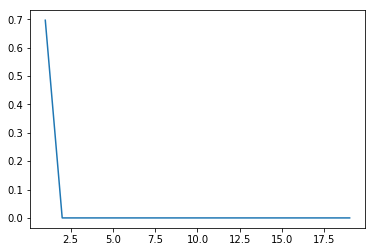

BEST k:  1
BEST AUC-ROC:  0.6962820811417554


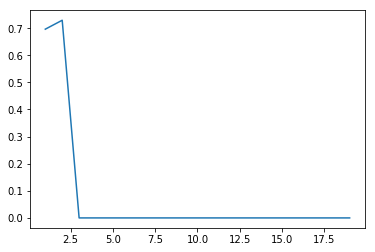

BEST k:  2
BEST AUC-ROC:  0.7292341931435151


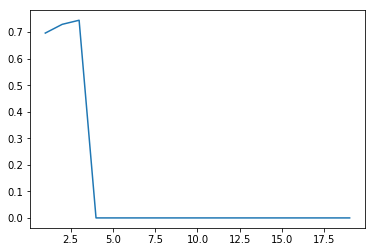

BEST k:  3
BEST AUC-ROC:  0.7446391255685163


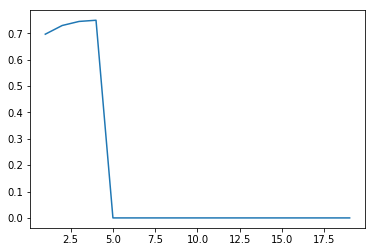

BEST k:  4
BEST AUC-ROC:  0.7491350500783182


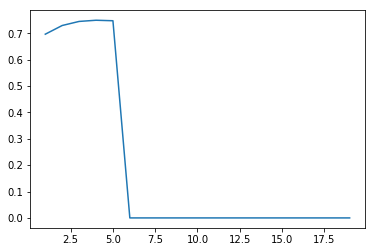

BEST k:  4
BEST AUC-ROC:  0.7491350500783182


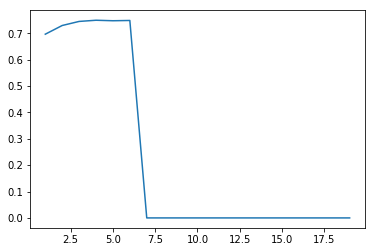

BEST k:  4
BEST AUC-ROC:  0.7491350500783182


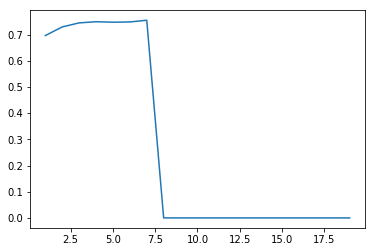

BEST k:  7
BEST AUC-ROC:  0.7547629753270924


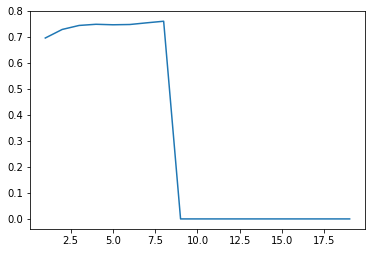

BEST k:  8
BEST AUC-ROC:  0.7608223871252033


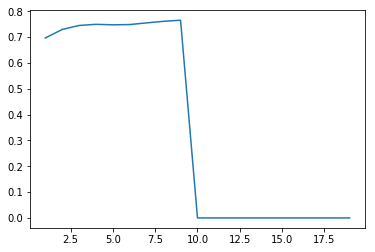

BEST k:  9
BEST AUC-ROC:  0.764923036888955


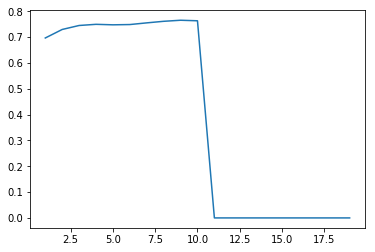

BEST k:  9
BEST AUC-ROC:  0.764923036888955


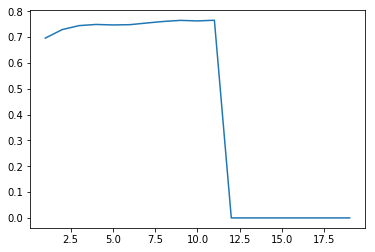

BEST k:  11
BEST AUC-ROC:  0.765443750040435


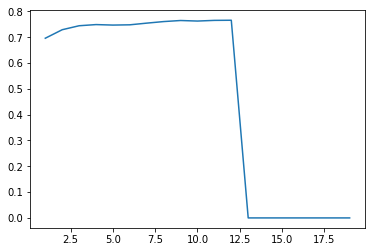

BEST k:  12
BEST AUC-ROC:  0.7659630255024544


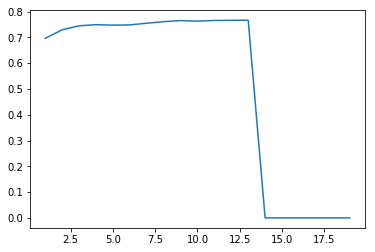

BEST k:  13
BEST AUC-ROC:  0.7662623344770152


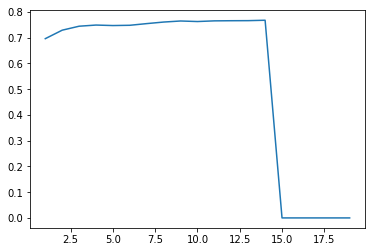

BEST k:  14
BEST AUC-ROC:  0.7678304942560712


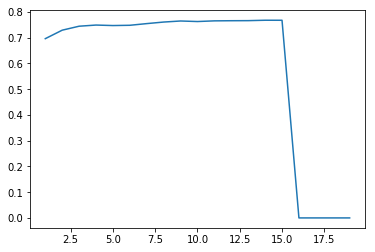

BEST k:  14
BEST AUC-ROC:  0.7678304942560712


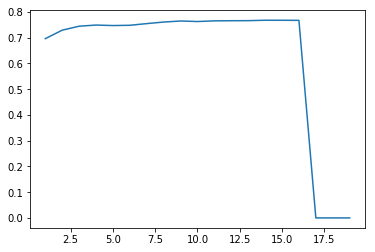

BEST k:  14
BEST AUC-ROC:  0.7678304942560712


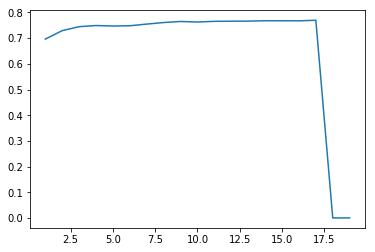

BEST k:  17
BEST AUC-ROC:  0.7697285139107237


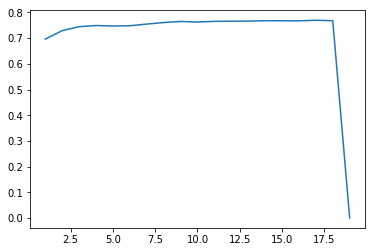

BEST k:  17
BEST AUC-ROC:  0.7697285139107237


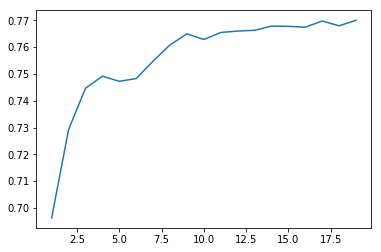

BEST k:  19
BEST AUC-ROC:  0.7700040111535948


In [42]:
mod_train = MakeCountersAndNormalize(X_train, X_train, y_train)
mod_test = MakeCountersAndNormalize(X_test, X_train, y_train)

k_list = np.arange(1, 20)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree").fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])

    plt.plot(k_list, auc_roc)
    plt.show()

    print("BEST k: ", k_list[np.argmax(auc_roc)])
    print("BEST AUC-ROC: ", np.max(auc_roc))

#### 4. Добавьте в исходную выборку парные признаки — то есть для каждой пары $(f_i, f_j)$, $i < j$ исходных категориальных признаков добавьте новый категориальный признак $f_{ij}$, значение которого является конкатенацией значений $f_i$ и $f_j$ (желательно через какой-нибудь специальный символ во избежание коллизий). Посчитайте счетчики для этой выборки, найдите качество метода $k$ ближайших соседей с наилучшим $k$ (с фолдингом и без).

In [43]:
def MakePairFeatures(train):
    train_modified = train.copy()

    for i, feature1 in enumerate(train.columns):
        for feature2 in train.columns[i+1:]:
            train_modified[feature1 + "+" + feature2] = train[feature1].astype(str) + "#" + train[feature2].astype(str)

    return train_modified

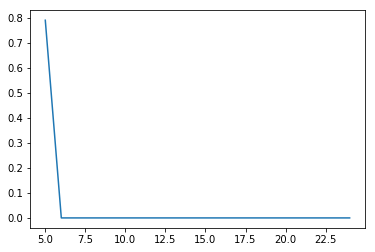

BEST k:  5
BEST AUC-ROC:  0.7894792221524943


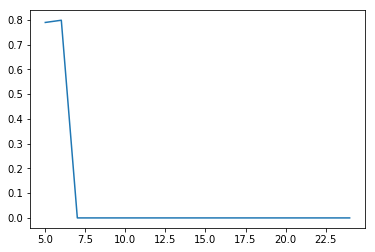

BEST k:  6
BEST AUC-ROC:  0.7984016128000369


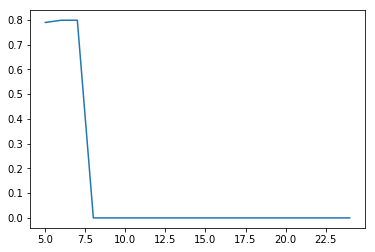

BEST k:  7
BEST AUC-ROC:  0.7984327028346205


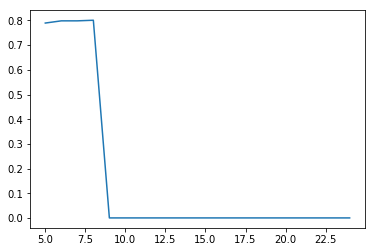

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


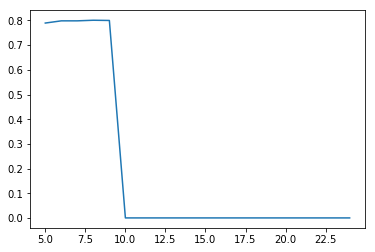

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


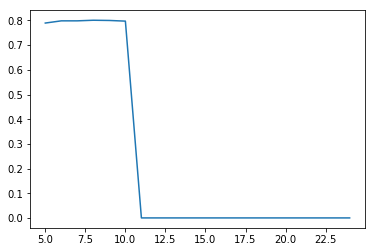

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


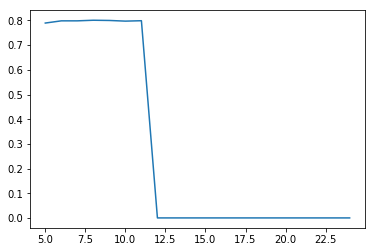

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


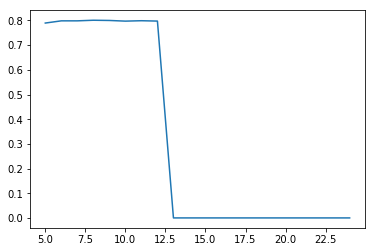

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


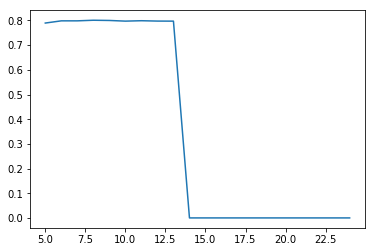

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


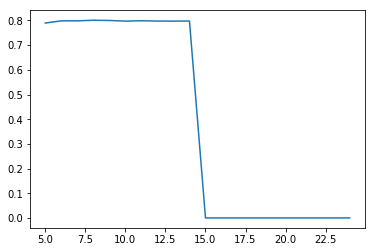

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


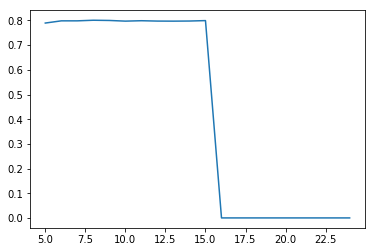

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


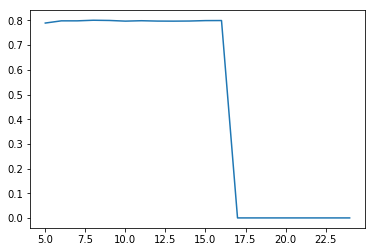

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


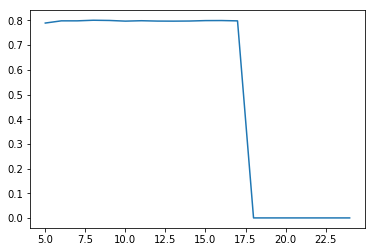

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


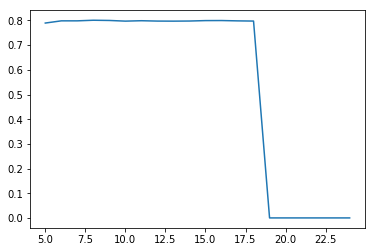

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


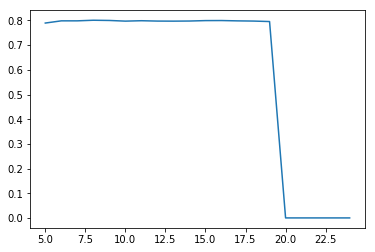

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


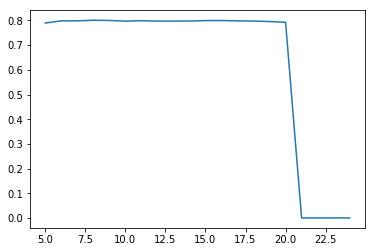

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


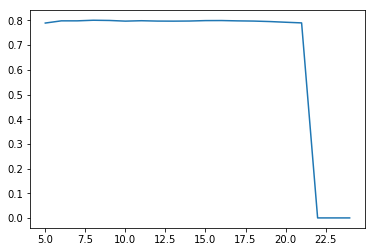

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


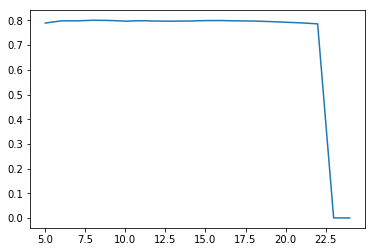

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


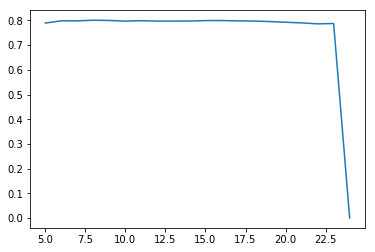

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


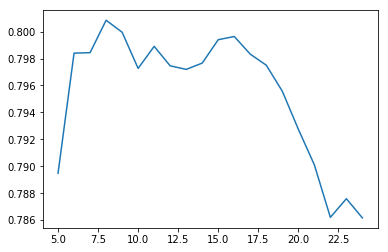

BEST k:  8
BEST AUC-ROC:  0.8008419109480773


In [44]:
train, test = MakePairFeatures(X_train), MakePairFeatures(X_test)
mod_train = MakeCounters(train, train, y_train)
mod_test = MakeCounters(test, train, y_train)

k_list = np.arange(5, 25)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm= "kd_tree", n_jobs = -1).fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])

    plt.plot(k_list, auc_roc)
    plt.show()

    print("BEST k: ", k_list[np.argmax(auc_roc)])
    print("BEST AUC-ROC: ", np.max(auc_roc))

## Часть 3: Решающие деревья и леса


#### 1. Возьмите из предыдущей части выборку с парными признаками, преобразованную с помощью счетчиков без фолдинга. Настройте решающее дерево, подобрав оптимальные значения параметров `max_depth` и `min_samples_leaf`. Какой наилучший AUC-ROC на контроле удалось получить?

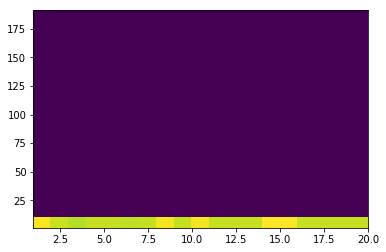

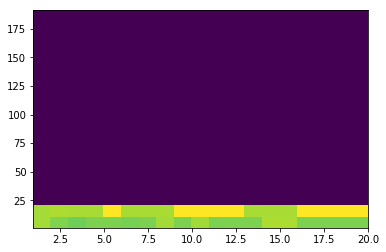

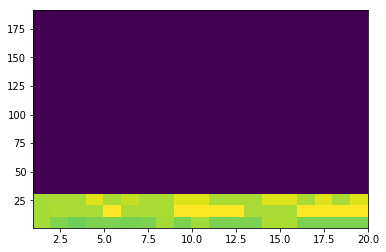

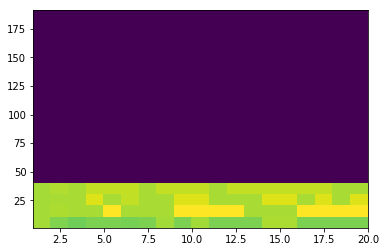

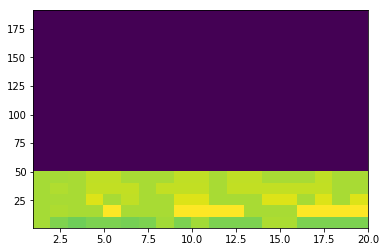

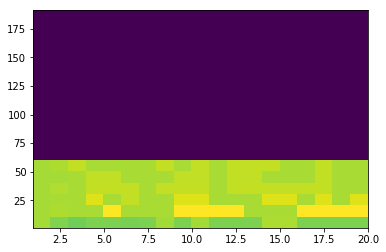

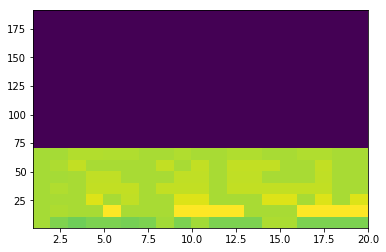

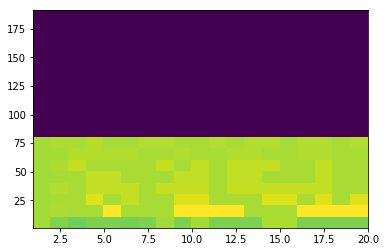

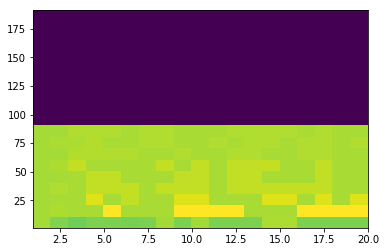

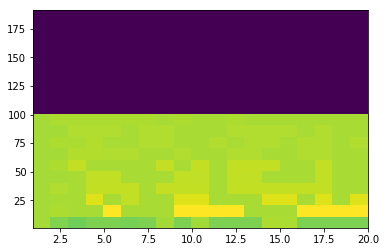

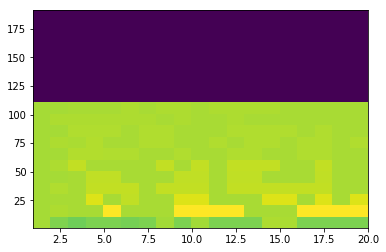

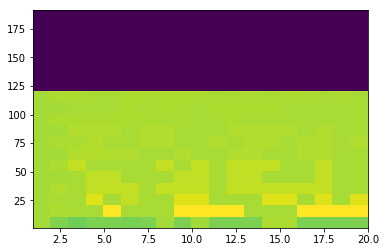

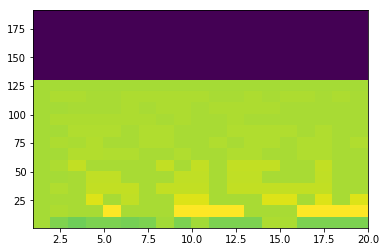

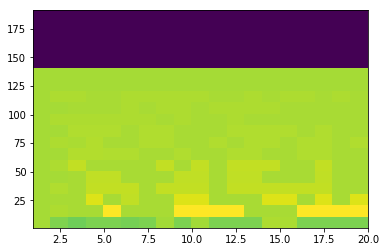

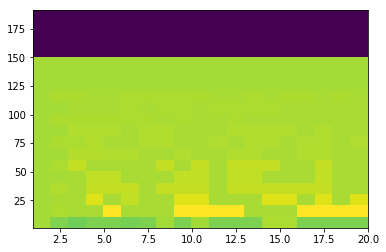

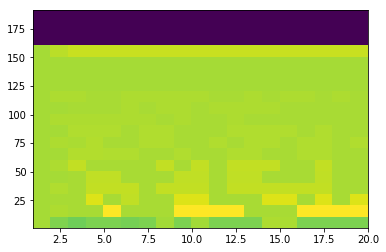

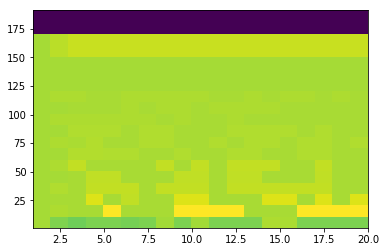

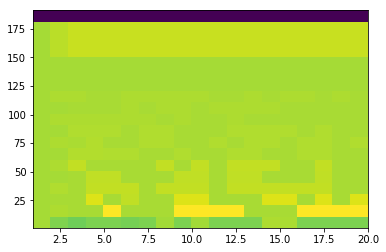

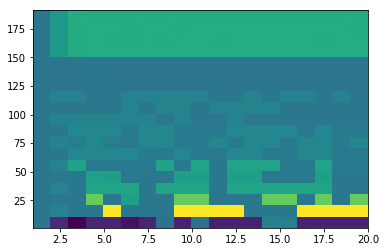

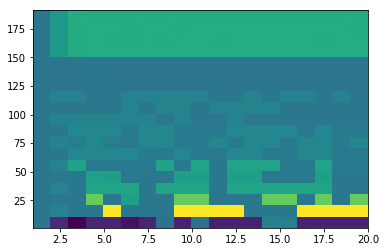

In [45]:
depth = np.arange(1, 21)
samples_leaf = np.arange(1, 200, 10).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.empty(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
        clf = clf.fit(mod_train, y_train)
        zgrid[sl][d] = sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])

    plt.pcolor(xgrid, ygrid, zgrid)
    plt.show()

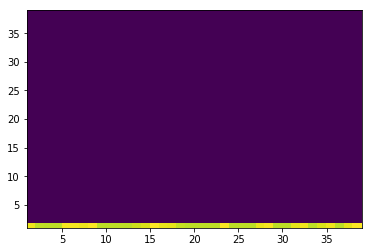

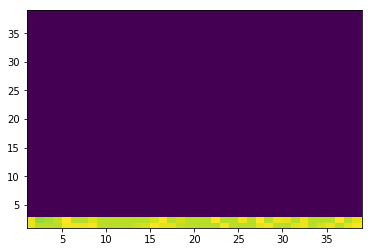

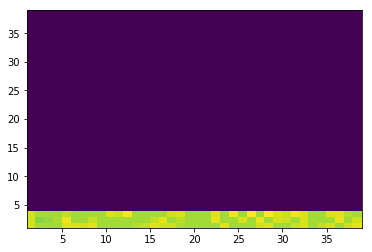

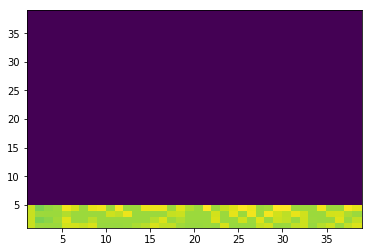

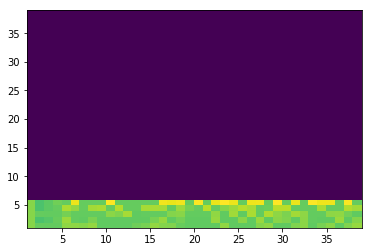

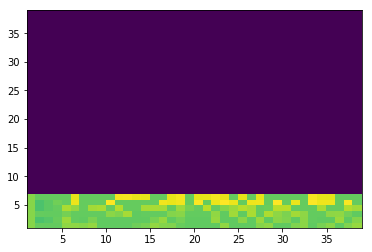

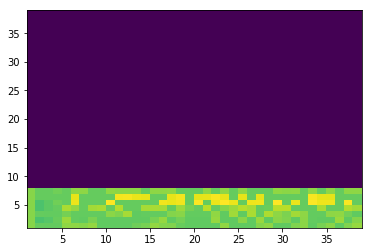

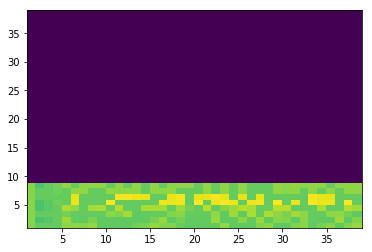

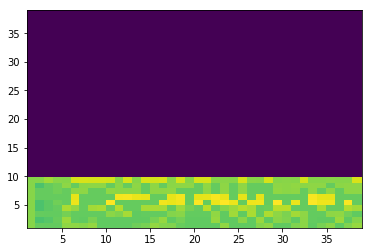

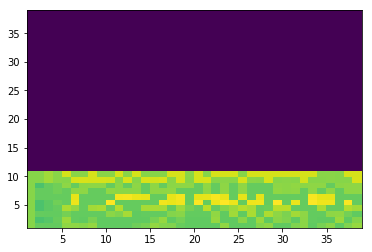

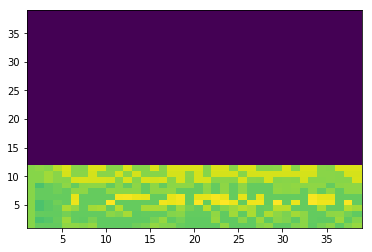

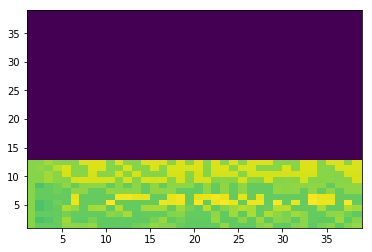

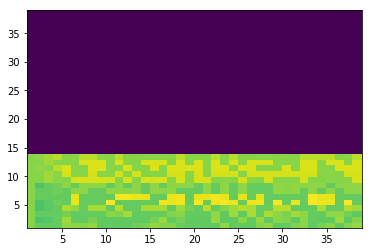

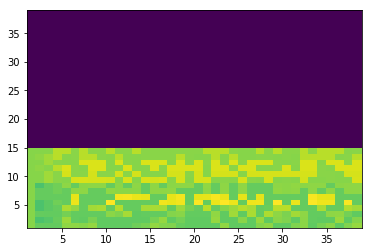

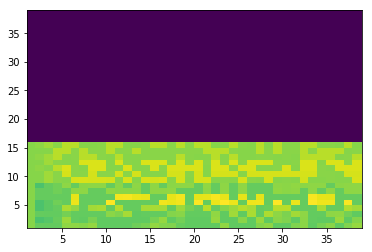

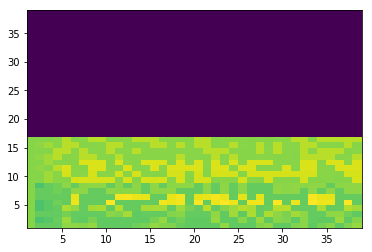

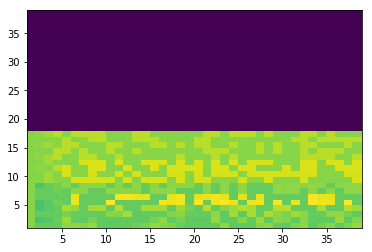

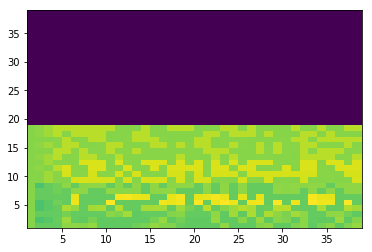

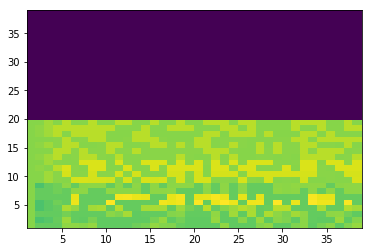

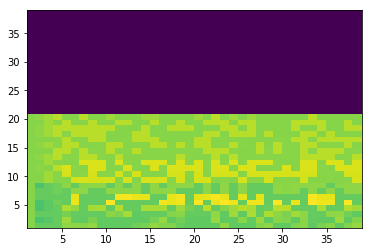

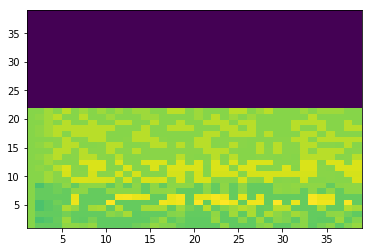

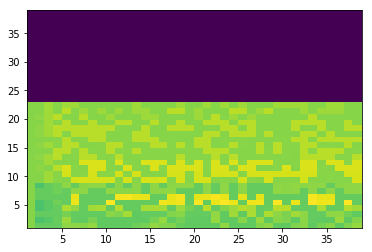

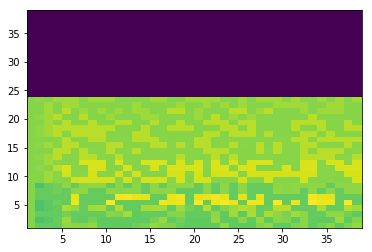

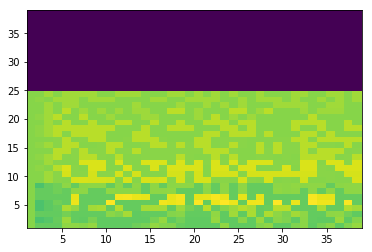

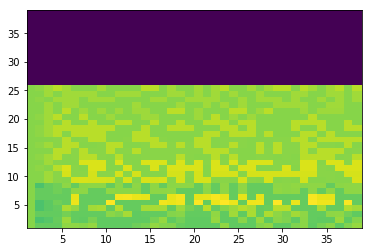

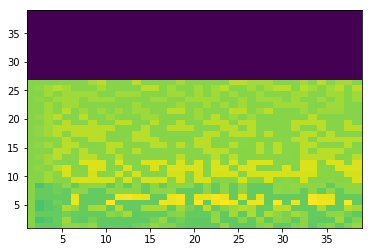

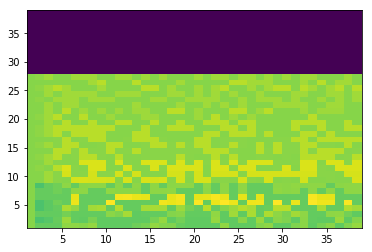

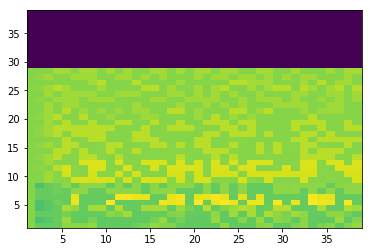

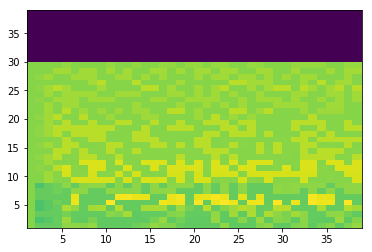

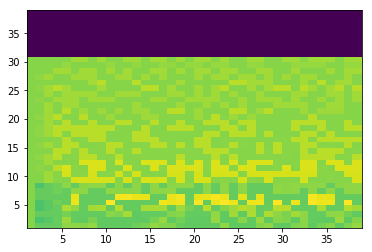

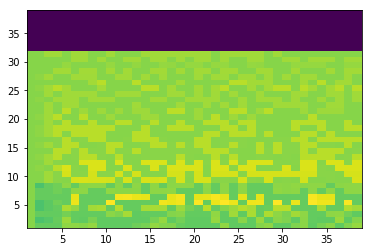

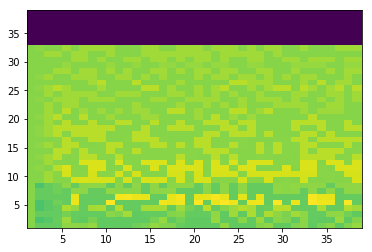

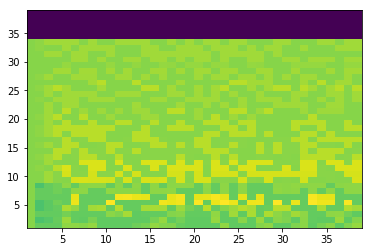

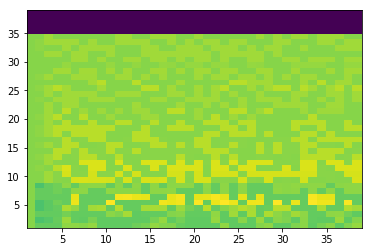

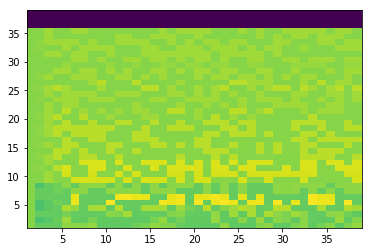

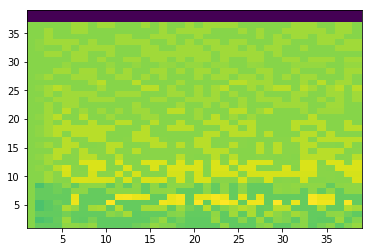

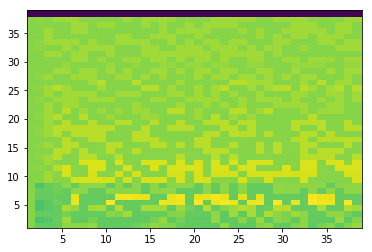

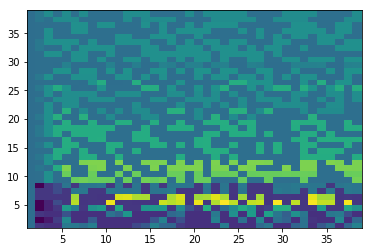

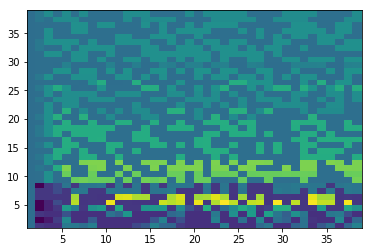

In [55]:
depth = np.arange(1, 40)
samples_leaf = np.arange(1, 40).astype(int)
xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.empty(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
        clf = clf.fit(mod_train, y_train)
        zgrid[sl][d] = sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])

    plt.pcolor(xgrid, ygrid, zgrid)
    plt.show()

In [56]:
clf = tree.DecisionTreeClassifier(max_depth=39, min_samples_leaf=7)
clf = clf.fit(mod_train, y_train)
print("best AUC_ROC: ", sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1]))

best AUC_ROC:  0.5382891747015537


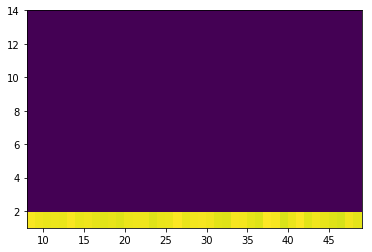

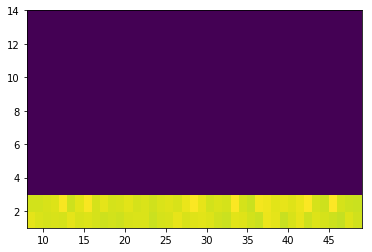

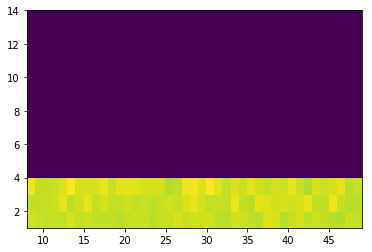

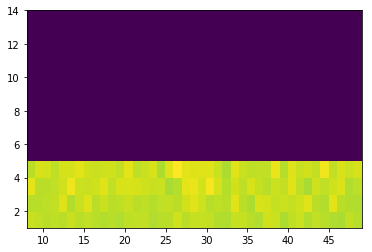

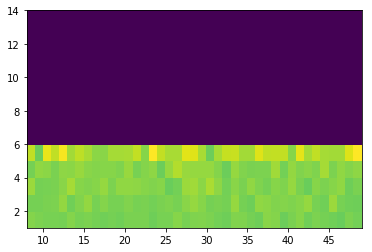

In [ ]:
depth = np.arange(8, 50)
samples_leaf = np.arange(1, 15).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.zeros(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):

        for test_k in range(5):
            clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
            clf = clf.fit(mod_train, y_train)
            zgrid[sl][d] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        zgrid[sl][d] /= 5

    plt.pcolor(xgrid, ygrid, zgrid)
    plt.show()

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=26, min_samples_leaf=13)
clf = clf.fit(mod_train, y_train)
print(sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1]))

#### 2. Настройте случайный лес, подобрав такое число деревьев `n_estimators`, при котором ошибка выходит на асимптоту. Какое качество на тестовой выборке он дает?

In [ ]:
n_set = np.arange(1, 20)
results = np.zeros(n_set.shape[0])
overfitting = np.zeros(n_set.shape[0])
for i, n in enumerate(n_set):
    for k in range(5):
        clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth=5, min_samples_leaf=20, n_jobs = -1)
        clf = clf.fit(mod_train, y_train)
        results[i] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        overfitting[i] += sklearn.metrics.roc_auc_score(y_train, clf.predict_proba(mod_train)[:, 1])

    results[i] /= 5
    overfitting[i] /= 5

#### 3. Возьмите выборку с парными признаками, для которой счетчики посчитаны с фолдингом. Обучите на ней случайный лес, подобрав число деревьев. Какое качество на тестовой выборке он дает? Чем вы можете объяснить изменение результата по сравнению с предыдущим пунктом?

In [ ]:
n_set = np.arange(1, 20)
results = np.zeros(n_set.shape[0])
overfitting = np.zeros(n_set.shape[0])
for i, n in enumerate(n_set):
    for k in range(5):\
        clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth=5, min_samples_leaf=20, n_jobs = -1)
        clf = clf.fit(mod_train_wf, y_train)
        results[i] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test_wf)[:, 1])
        overfitting[i] += sklearn.metrics.roc_auc_score(y_train, clf.predict_proba(mod_train_wf)[:, 1])

    results[i] /= 5
    overfitting[i] /= 5

In [ ]:
clf = ensemble.RandomForestClassifier(n_estimators = 16, max_depth=8, min_samples_leaf=15, n_jobs = -1)
clf = clf.fit(mod_train_wf, y_train)
print("FINAL RESULT: ", sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test_wf)[:, 1]))

Здесь вы можете поделиться своими мыслями о задании.

Первое задание очень интересное, большая схожесть с задачами, которые мы делали на датабазах.
Второе задание гораздо сложнее.

Боль, горечь, уныние.

А здесь вставьте смешную картинку.

https://i.imgflip.com/z59x6.jpg
Когда посмотрела свою аттестацию

А здесь посоветуйте преподавателям хороший фильм или сериал.

50 дней до моего самоубийства,
Похороните меня за плинтусом

